## Automated Code

In [70]:
import os
import numpy as np
import pandas as pd
path_to_json = r""
folders = [pos_json for pos_json in os.listdir(path_to_json) ]
print(folders)

['.DS_Store', '._.DS_Store', '._non-rumours', '._rumours', 'non-rumours', 'rumours']


In [71]:
#folders[0]
import json
import csv

In [72]:
base = r""

## Extract features from json and write to csv file on disk

##### Non Rumours

In [73]:
data=[]
mix_data = []
data_reactions = []
for folder in folders:
    if folder == 'non-rumours':
            within_tweetid = os.path.join(base, folder)
            #print(within_tweetid)
            within_folders = [pos for pos in os.listdir(within_tweetid)]
            #print(within_folders)
            for file in within_folders:
                within_tweetfolder = os.path.join(base, folder, file)
                #print (within_tweetfolder)
                src_tweet = [pos for pos in os.listdir(within_tweetfolder)]
                #print(src_tweet)
                if  src_tweet[src_tweet.index('source-tweets')] == 'source-tweets':
                    source = os.path.join(base, folder, file, within_tweetfolder, src_tweet[src_tweet.index('source-tweets')])
                    #print(source)
                    tweets = [pos for pos in os.listdir(source)]
                    #print(tweets)
                    for tweet in tweets:
                        ids = os.path.join(base, folder, file, within_tweetfolder, src_tweet[src_tweet.index('source-tweets')], tweet)
                        if ids.endswith('.json') and '._' not in ids:     
                            #print(ids)
                            with open(ids,'r') as f:
                                src_json = json.load(f)
                            #print(src_json)
                            src_df_json = pd.DataFrame(src_json)
                            #temp = src_df.user.location
                            #temp1 = src_df.user.followers_count
                            #temp2 = src_df.user.id
                            src_df = src_df_json[['text','created_at','id']].copy()
                            src_df['location'] = src_df_json.user.location
                            src_df['followers'] = src_df_json.user.followers_count
                            src_df['user_id'] = src_df_json.user.id
                            src_df['favorite_count'] = src_df_json.favorite_count
                            src_df['retweet_count'] = src_df_json.retweet_count
                            src_df['verified'] = src_df_json.user.verified
                            src_df = src_df.reset_index()
                            src_df.drop(['index'], axis = 1, inplace = True)
                            src_df = src_df.iloc[0,:]
                            src_df = src_df.reset_index()
                            src_df.drop("index", axis = 1, inplace = True)
                            #print(src_df)
                            data.append(src_df.iloc[2,0])
                            data.append(src_df.iloc[0,0])
                            data.append(src_df.iloc[1,0])
                            data.append(src_df.iloc[3,0])
                            data.append(src_df.iloc[4,0])
                            data.append(src_df.iloc[5,0])
                            data.append(src_df.iloc[6,0])
                            data.append(src_df.iloc[7,0])
                            data.append(src_df.iloc[8,0])
                            #print("***********************************************************************")
        
                if  src_tweet[src_tweet.index('reactions')] == 'reactions':
                    reactions = os.path.join(base, folder, file, within_tweetfolder, src_tweet[src_tweet.index('reactions')])
                    #print(reactions)
                    tweets_reactions = [pos for pos in os.listdir(reactions)]
                    for tweet_reaction in tweets_reactions:
                        #mix_data = []
                        #mix_data.extend(data)
                        ids_reactions = os.path.join(base, folder, file, within_tweetfolder, src_tweet[src_tweet.index('reactions')], tweet_reaction)
                        if ids_reactions.endswith('.json') and '._' not in ids_reactions:
                            #data_reactions = []
                            with open(ids_reactions,'r') as f:
                                reactions_json = json.load(f)
                            reactions_df_json = pd.DataFrame(reactions_json)
                            #temp = reactions_df.user.location
                            #temp1 = reactions_df.user.followers_count
                            #temp2 = reactions_df.in_reply_to_status_id
                            #temp3 = reactions_df.user.id
                            reactions_df = reactions_df_json[['text', 'created_at', 'id']].copy()
                            reactions_df['location'] = reactions_df_json.user.location
                            reactions_df['followers_count'] = reactions_df_json.user.followers_count
                            reactions_df['in_reply_to_status_id']=reactions_df_json.in_reply_to_status_id
                            reactions_df['user_id']=reactions_df_json.user.id
                            reactions_df['verified']=reactions_df_json.user.verified
                            reactions_df = reactions_df.reset_index()
                            reactions_df.drop(['index'], axis = 1, inplace = True)
                            reactions_df = reactions_df.iloc[0,:]
                            reactions_df = reactions_df.reset_index()
                            reactions_df.drop("index", axis = 1, inplace = True)
                            data_reactions.append(reactions_df.iloc[2,0])
                            data_reactions.append(reactions_df.iloc[0,0])
                            data_reactions.append(reactions_df.iloc[1,0])
                            data_reactions.append(reactions_df.iloc[3,0])
                            data_reactions.append(reactions_df.iloc[4,0])
                            data_reactions.append(reactions_df.iloc[5,0])
                            data_reactions.append(reactions_df.iloc[6,0])
                            data_reactions.append(reactions_df.iloc[7,0])
                                #mix_data.extend(data_reactions)

In [74]:
rows = [data[i:i+9] for i in range(0, len(data), 9)]
column_names = ['id','text', 'time', 'location','followers','user_id','favorite_count','retweet_count','verified']

# Convert the list of lists into a NumPy array
data_array = np.array(rows)

# Create a DataFrame from the NumPy array
df_non_rumors = pd.DataFrame(data_array,columns=column_names)

In [75]:
rows = [data_reactions[i:i+8] for i in range(0, len(data_reactions), 8)]
column_names = ['reply_id','reply_text', 'reply_time', 'reply_location', 'reply_followers','in_reply_to_status_id','reply_user_id','reply_verified']

# Convert the list of lists into a NumPy array
data_array = np.array(rows)

# Create a DataFrame from the NumPy array
df_non_rumors_reactions = pd.DataFrame(data_array,columns=column_names)

In [76]:
df_non_rumors['rumour']=0
df_non_rumors.id= df_non_rumors.id.astype('int64')
df_non_rumors_reactions = df_non_rumors_reactions[(df_non_rumors_reactions.in_reply_to_status_id.notnull())]
df_non_rumors_reactions.in_reply_to_status_id= df_non_rumors_reactions.in_reply_to_status_id.astype('int64')

In [77]:
df_non_rumors = df_non_rumors.merge(df_non_rumors_reactions,left_on='id', right_on='in_reply_to_status_id').drop(columns=['in_reply_to_status_id'])

##### Rumours

In [78]:
data=[]
mix_data = []
data_reactions = []
for folder in folders:
    if folder == 'rumours':
            within_tweetid = os.path.join(base, folder)
            #print(within_tweetid)
            within_folders = [pos for pos in os.listdir(within_tweetid)]
            #print(within_folders)
            for file in within_folders:
                within_tweetfolder = os.path.join(base, folder, file)
                #print (within_tweetfolder)
                src_tweet = [pos for pos in os.listdir(within_tweetfolder)]
                #print(src_tweet)
                if  src_tweet[src_tweet.index('source-tweets')] == 'source-tweets':
                    source = os.path.join(base, folder, file, within_tweetfolder, src_tweet[src_tweet.index('source-tweets')])
                    #print(source)
                    tweets = [pos for pos in os.listdir(source)]
                    #print(tweets)
                    for tweet in tweets:
                        ids = os.path.join(base, folder, file, within_tweetfolder, src_tweet[src_tweet.index('source-tweets')], tweet)
                        if ids.endswith('.json') and '._' not in ids:     
                            #print(ids)
                            with open(ids,'r') as f:
                                src_json = json.load(f)
                            #print(src_json)
                            src_df_json = pd.DataFrame(src_json)
                            #temp = src_df.user.location
                            #temp1 = src_df.user.followers_count
                            #temp2 = src_df.user.id
                            src_df = src_df_json[['text','created_at','id']].copy()
                            src_df['location'] = src_df_json.user.location
                            src_df['followers'] = src_df_json.user.followers_count
                            src_df['user_id'] = src_df_json.user.id
                            src_df['favorite_count'] = src_df_json.favorite_count
                            src_df['retweet_count'] = src_df_json.retweet_count
                            src_df['verified'] = src_df_json.user.verified
                            src_df = src_df.reset_index()
                            src_df.drop(['index'], axis = 1, inplace = True)
                            src_df = src_df.iloc[0,:]
                            src_df = src_df.reset_index()
                            src_df.drop("index", axis = 1, inplace = True)
                            #print(src_df)
                            data.append(src_df.iloc[2,0])
                            data.append(src_df.iloc[0,0])
                            data.append(src_df.iloc[1,0])
                            data.append(src_df.iloc[3,0])
                            data.append(src_df.iloc[4,0])
                            data.append(src_df.iloc[5,0])
                            data.append(src_df.iloc[6,0])
                            data.append(src_df.iloc[7,0])
                            data.append(src_df.iloc[8,0])
                            #print("***********************************************************************")
        
                if  src_tweet[src_tweet.index('reactions')] == 'reactions':
                    reactions = os.path.join(base, folder, file, within_tweetfolder, src_tweet[src_tweet.index('reactions')])
                    #print(reactions)
                    tweets_reactions = [pos for pos in os.listdir(reactions)]
                    for tweet_reaction in tweets_reactions:
                        #mix_data = []
                        #mix_data.extend(data)
                        ids_reactions = os.path.join(base, folder, file, within_tweetfolder, src_tweet[src_tweet.index('reactions')], tweet_reaction)
                        if ids_reactions.endswith('.json') and '._' not in ids_reactions:
                            #data_reactions = []
                            with open(ids_reactions,'r') as f:
                                reactions_json = json.load(f)
                            reactions_df_json = pd.DataFrame(reactions_json)
                            #temp = reactions_df.user.location
                            #temp1 = reactions_df.user.followers_count
                            #temp2 = reactions_df.in_reply_to_status_id
                            #temp3 = reactions_df.user.id
                            reactions_df = reactions_df_json[['text', 'created_at', 'id']].copy()
                            reactions_df['location'] = reactions_df_json.user.location
                            reactions_df['followers_count'] = reactions_df_json.user.followers_count
                            reactions_df['in_reply_to_status_id']=reactions_df_json.in_reply_to_status_id
                            reactions_df['user_id']=reactions_df_json.user.id
                            reactions_df['verified']=reactions_df_json.user.verified
                            reactions_df = reactions_df.reset_index()
                            reactions_df.drop(['index'], axis = 1, inplace = True)
                            reactions_df = reactions_df.iloc[0,:]
                            reactions_df = reactions_df.reset_index()
                            reactions_df.drop("index", axis = 1, inplace = True)
                            data_reactions.append(reactions_df.iloc[2,0])
                            data_reactions.append(reactions_df.iloc[0,0])
                            data_reactions.append(reactions_df.iloc[1,0])
                            data_reactions.append(reactions_df.iloc[3,0])
                            data_reactions.append(reactions_df.iloc[4,0])
                            data_reactions.append(reactions_df.iloc[5,0])
                            data_reactions.append(reactions_df.iloc[6,0])
                            data_reactions.append(reactions_df.iloc[7,0])
                                #mix_data.extend(data_reactions)

In [79]:
rows = [data[i:i+9] for i in range(0, len(data), 9)]
column_names =  ['id','text', 'time', 'location','followers','user_id','favorite_count','retweet_count','verified']

# Convert the list of lists into a NumPy array
data_array = np.array(rows)

# Create a DataFrame from the NumPy array
df_rumors = pd.DataFrame(data_array,columns=column_names)

In [80]:
rows = [data_reactions[i:i+8] for i in range(0, len(data_reactions), 8)]
column_names = ['reply_id','reply_text', 'reply_time', 'reply_location', 'reply_followers','in_reply_to_status_id','reply_user_id','reply_verified']

# Convert the list of lists into a NumPy array
data_array = np.array(rows)

# Create a DataFrame from the NumPy array
df_rumors_reactions = pd.DataFrame(data_array,columns=column_names)

In [81]:
df_rumors['rumour']=1
df_rumors.id= df_rumors.id.astype('int64')
df_rumors_reactions = df_rumors_reactions[(df_rumors_reactions.in_reply_to_status_id.notnull())]
df_rumors_reactions.in_reply_to_status_id= df_rumors_reactions.in_reply_to_status_id.astype('int64')

In [82]:
df_rumors=df_rumors.merge(df_rumors_reactions,left_on='id', right_on='in_reply_to_status_id').drop(columns=['in_reply_to_status_id'])

#### Final df

In [83]:
final_df = pd.concat([df_rumors,df_non_rumors])

In [84]:
final_df.to_csv(r"putinmissing-all-rnr-threads.csv")

In [85]:
final_df

,id,text,time,location,followers,user_id,favorite_count,retweet_count,verified,rumour,reply_id,reply_text,reply_time,reply_location,reply_followers,reply_user_id,reply_verified
0,576181101577703424,Don't know if #putindead is true but trying to...,Fri Mar 13 00:40:54 +0000 2015,USA(not affiliated w/ USgovt.),1485,1333122608,5,8,False,1,576441584784252929,@AmDefNews Fingers crossed.,Fri Mar 13 17:55:58 +0000 2015,,27,2557287270,False
1,576191681827057664,Is Putin facing palace coup? http://t.co/FOGZj...,Fri Mar 13 01:22:56 +0000 2015,Indiana,33689,44504025,0,2,False,1,576218291909214209,@jsph1959 Putin isn't dead.. he was just hidin...,Fri Mar 13 03:08:41 +0000 2015,"Orlando, Fl",986,2358125977,False
2,576192621351145472,"""Putin umer"" or ""Putin has died,"" is now trend...",Fri Mar 13 01:26:40 +0000 2015,,13,1925331925,1,7,False,1,576193576993869825,@MikeDiazFL @LToddWood We can only hope at t...,Fri Mar 13 01:30:28 +0000 2015,United States,1271,2992686426,False
3,576204915694964737,Is Putin facing palace coup? http://t.co/FOGZj...,Fri Mar 13 02:15:31 +0000 2015,Indiana,33688,44504025,2,2,False,1,576213134861451264,@jsph1959 If a coup would happen in Russia.......,Fri Mar 13 02:48:11 +0000 2015,,310,2371261604,False
4,576225987119198208,#putindead #putin Can Putin's Absence Indicate...,Fri Mar 13 03:39:15 +0000 2015,NYC,230,19432996,12,26,False,1,576272369091756032,@kssg @Forbes If Putin remains out of sight fo...,Fri Mar 13 06:43:34 +0000 2015,"Kampala, Uganda",533,721722306,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,577300802294804481,Putin in film on Crimea: ‘American friends’ ar...,Mon Mar 16 02:50:11 +0000 2015,,907073,64643056,144,227,True,0,577304795779829760,.@RT_com Isn't paranoia the first sign of deme...,Mon Mar 16 03:06:03 +0000 2015,,814,2381131435,False
150,577300802294804481,Putin in film on Crimea: ‘American friends’ ar...,Mon Mar 16 02:50:11 +0000 2015,,907073,64643056,144,227,True,0,577304877858181120,"@RT_com Putin has 85% approval, I think Obama ...",Mon Mar 16 03:06:23 +0000 2015,Greater Chicago Area,176,83448956,False
151,577302850318938113,"There was no coup in #Ukraine, #Putin now admi...",Mon Mar 16 02:58:19 +0000 2015,"CA, UA",181,104814061,8,26,False,0,577329191567302657,@sbandera \ndo we really want to make the whol...,Mon Mar 16 04:43:00 +0000 2015,,2,1643879654,False
152,577302850318938113,"There was no coup in #Ukraine, #Putin now admi...",Mon Mar 16 02:58:19 +0000 2015,"CA, UA",181,104814061,8,26,False,0,578598438025195520,@sbandera @Ashtray_Cowboy a coup is when a gu...,Thu Mar 19 16:46:32 +0000 2015,,62,268466245,False


## Load csv file where data is written

In [66]:
df = pd.read_csv(r"dump_charliehebdo.csv", encoding = 'utf-8',header=0)

In [67]:
rumour_df = df[['id','user_id','text', 'time', 'location','followers', 'reply_id','reply_user_id','reply_text', 'reply_time', 'reply_location', 'reply_followers', 'rumour']]

In [68]:
rumour_df.head()

,id,user_id,text,time,location,followers,reply_id,reply_user_id,reply_text,reply_time,reply_location,reply_followers,rumour
0,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552787794503143424,202572421,@H_E_Samuel @George_Berridge @michael_taggart ...,Wed Jan 07 11:24:15 +0000 2015,NaN,40,1
1,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552789647966109696,239943362,@H_E_Samuel Hi Henry would you be willing to g...,Wed Jan 07 11:31:37 +0000 2015,Zimbabwe-London,375,1
2,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552791411053973505,2903715212,@H_E_Samuel @H_E_Samuel please call them terro...,Wed Jan 07 11:38:37 +0000 2015,delhi,17,1
3,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552793152390955009,2911191121,@H_E_Samuel French govt needs to take strict a...,Wed Jan 07 11:45:32 +0000 2015,NaN,54,1
4,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552805055741849601,1348798826,@H_E_Samuel @terrychristian if only people di...,Wed Jan 07 12:32:50 +0000 2015,Shredsville,683,1


In [69]:
rumour_df = rumour_df.reset_index()
rumour_df = rumour_df.drop('index', axis = 1)
rumour_df.head()

,id,user_id,text,time,location,followers,reply_id,reply_user_id,reply_text,reply_time,reply_location,reply_followers,rumour
0,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552787794503143424,202572421,@H_E_Samuel @George_Berridge @michael_taggart ...,Wed Jan 07 11:24:15 +0000 2015,NaN,40,1
1,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552789647966109696,239943362,@H_E_Samuel Hi Henry would you be willing to g...,Wed Jan 07 11:31:37 +0000 2015,Zimbabwe-London,375,1
2,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552791411053973505,2903715212,@H_E_Samuel @H_E_Samuel please call them terro...,Wed Jan 07 11:38:37 +0000 2015,delhi,17,1
3,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552793152390955009,2911191121,@H_E_Samuel French govt needs to take strict a...,Wed Jan 07 11:45:32 +0000 2015,NaN,54,1
4,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552805055741849601,1348798826,@H_E_Samuel @terrychristian if only people di...,Wed Jan 07 12:32:50 +0000 2015,Shredsville,683,1


In [70]:
rumour_df.shape

(19050, 13)

## NLP Stuff

In [71]:
import re
# function for cleaning data
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [72]:
rumour_df['clean_text'] = np.vectorize(remove_pattern)(rumour_df['text'], "@[\w]*")
rumour_df['clean_reply'] = np.vectorize(remove_pattern)(rumour_df['reply_text'], "@[\w]*")

In [73]:
rumour_df.head()

,id,user_id,text,time,location,followers,reply_id,reply_user_id,reply_text,reply_time,reply_location,reply_followers,rumour,clean_text,clean_reply
0,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552787794503143424,202572421,@H_E_Samuel @George_Berridge @michael_taggart ...,Wed Jan 07 11:24:15 +0000 2015,NaN,40,1,"Breaking: At least 10 dead, 5 injured after tO...",The religion of peace strikes again.
1,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552789647966109696,239943362,@H_E_Samuel Hi Henry would you be willing to g...,Wed Jan 07 11:31:37 +0000 2015,Zimbabwe-London,375,1,"Breaking: At least 10 dead, 5 injured after tO...",Hi Henry would you be willing to give ITV New...
2,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552791411053973505,2903715212,@H_E_Samuel @H_E_Samuel please call them terro...,Wed Jan 07 11:38:37 +0000 2015,delhi,17,1,"Breaking: At least 10 dead, 5 injured after tO...","please call them terrorists not gunmen, don'..."
3,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552793152390955009,2911191121,@H_E_Samuel French govt needs to take strict a...,Wed Jan 07 11:45:32 +0000 2015,NaN,54,1,"Breaking: At least 10 dead, 5 injured after tO...",French govt needs to take strict action.
4,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552805055741849601,1348798826,@H_E_Samuel @terrychristian if only people di...,Wed Jan 07 12:32:50 +0000 2015,Shredsville,683,1,"Breaking: At least 10 dead, 5 injured after tO...",if only people didn't hand out guns:https:/...


In [74]:
rumour_df = rumour_df[['id','user_id','clean_text', 'time', 'location','followers', 'reply_id','reply_user_id','clean_reply', 'reply_time', 'reply_location', 'reply_followers', 'rumour']]

In [75]:
rumour_df.head()

,id,user_id,clean_text,time,location,followers,reply_id,reply_user_id,clean_reply,reply_time,reply_location,reply_followers,rumour
0,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552787794503143424,202572421,The religion of peace strikes again.,Wed Jan 07 11:24:15 +0000 2015,NaN,40,1
1,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552789647966109696,239943362,Hi Henry would you be willing to give ITV New...,Wed Jan 07 11:31:37 +0000 2015,Zimbabwe-London,375,1
2,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552791411053973505,2903715212,"please call them terrorists not gunmen, don'...",Wed Jan 07 11:38:37 +0000 2015,delhi,17,1
3,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552793152390955009,2911191121,French govt needs to take strict action.,Wed Jan 07 11:45:32 +0000 2015,NaN,54,1
4,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552805055741849601,1348798826,if only people didn't hand out guns:https:/...,Wed Jan 07 12:32:50 +0000 2015,Shredsville,683,1


In [76]:
rumour_df['clean_text'] = rumour_df['clean_text'].str.replace("[^a-zA-Z#]", " ")
rumour_df['clean_reply'] = rumour_df['clean_reply'].str.replace("[^a-zA-Z#]", " ")

In [77]:
rumour_df.head()

,id,user_id,clean_text,time,location,followers,reply_id,reply_user_id,clean_reply,reply_time,reply_location,reply_followers,rumour
0,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552787794503143424,202572421,The religion of peace strikes again.,Wed Jan 07 11:24:15 +0000 2015,NaN,40,1
1,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552789647966109696,239943362,Hi Henry would you be willing to give ITV New...,Wed Jan 07 11:31:37 +0000 2015,Zimbabwe-London,375,1
2,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552791411053973505,2903715212,"please call them terrorists not gunmen, don'...",Wed Jan 07 11:38:37 +0000 2015,delhi,17,1
3,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552793152390955009,2911191121,French govt needs to take strict action.,Wed Jan 07 11:45:32 +0000 2015,NaN,54,1
4,552783238415265792,384779793,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552805055741849601,1348798826,if only people didn't hand out guns:https:/...,Wed Jan 07 12:32:50 +0000 2015,Shredsville,683,1


In [78]:
rumour_df['clean_text'] = rumour_df.clean_text.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
rumour_df['clean_reply'] = rumour_df.clean_reply.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

In [79]:
rumour_df.head()

,id,user_id,clean_text,time,location,followers,reply_id,reply_user_id,clean_reply,reply_time,reply_location,reply_followers,rumour
0,552783238415265792,384779793,"Breaking: least dead, injured after gunman ope...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552787794503143424,202572421,religion peace strikes again.,Wed Jan 07 11:24:15 +0000 2015,NaN,40,1
1,552783238415265792,384779793,"Breaking: least dead, injured after gunman ope...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552789647966109696,239943362,Henry would willing give News phone interview ...,Wed Jan 07 11:31:37 +0000 2015,Zimbabwe-London,375,1
2,552783238415265792,384779793,"Breaking: least dead, injured after gunman ope...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552791411053973505,2903715212,"please call them terrorists gunmen, don't dilu...",Wed Jan 07 11:38:37 +0000 2015,delhi,17,1
3,552783238415265792,384779793,"Breaking: least dead, injured after gunman ope...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552793152390955009,2911191121,French govt needs take strict action.,Wed Jan 07 11:45:32 +0000 2015,NaN,54,1
4,552783238415265792,384779793,"Breaking: least dead, injured after gunman ope...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552805055741849601,1348798826,only people didn't hand guns:https://t.co/iPBk...,Wed Jan 07 12:32:50 +0000 2015,Shredsville,683,1


In [80]:
rumour_df.clean_text = rumour_df.clean_text.apply(lambda x: x.split())
rumour_df.clean_reply = rumour_df.clean_reply.apply(lambda x: x.split())

In [81]:
rumour_df.head()

,id,user_id,clean_text,time,location,followers,reply_id,reply_user_id,clean_reply,reply_time,reply_location,reply_followers,rumour
0,552783238415265792,384779793,"[Breaking:, least, dead,, injured, after, gunm...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552787794503143424,202572421,"[religion, peace, strikes, again.]",Wed Jan 07 11:24:15 +0000 2015,NaN,40,1
1,552783238415265792,384779793,"[Breaking:, least, dead,, injured, after, gunm...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552789647966109696,239943362,"[Henry, would, willing, give, News, phone, int...",Wed Jan 07 11:31:37 +0000 2015,Zimbabwe-London,375,1
2,552783238415265792,384779793,"[Breaking:, least, dead,, injured, after, gunm...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552791411053973505,2903715212,"[please, call, them, terrorists, gunmen,, don'...",Wed Jan 07 11:38:37 +0000 2015,delhi,17,1
3,552783238415265792,384779793,"[Breaking:, least, dead,, injured, after, gunm...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552793152390955009,2911191121,"[French, govt, needs, take, strict, action.]",Wed Jan 07 11:45:32 +0000 2015,NaN,54,1
4,552783238415265792,384779793,"[Breaking:, least, dead,, injured, after, gunm...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552805055741849601,1348798826,"[only, people, didn't, hand, guns:https://t.co...",Wed Jan 07 12:32:50 +0000 2015,Shredsville,683,1


In [82]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet_text = rumour_df.clean_text.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet_reply = rumour_df.clean_reply.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [83]:
tokenized_tweet_text.head()

0    [breaking:, least, dead,, injur, after, gunman...
1    [breaking:, least, dead,, injur, after, gunman...
2    [breaking:, least, dead,, injur, after, gunman...
3    [breaking:, least, dead,, injur, after, gunman...
4    [breaking:, least, dead,, injur, after, gunman...
Name: clean_text, dtype: object

In [84]:
tokenized_tweet_reply.head()

0                     [religion, peac, strike, again.]
1    [henri, would, will, give, new, phone, intervi...
2    [pleas, call, them, terrorist, gunmen,, don't,...
3          [french, govt, need, take, strict, action.]
4    [onli, peopl, didn't, hand, guns:https://t.co/...
Name: clean_reply, dtype: object

In [85]:
for i in range(len(tokenized_tweet_text)):
    tokenized_tweet_text[i] = ' '.join(tokenized_tweet_text[i])    
rumour_df['clean_text'] = tokenized_tweet_text

In [86]:
for i in range(len(tokenized_tweet_reply)):
    tokenized_tweet_reply[i] = ' '.join(tokenized_tweet_reply[i])    
rumour_df['clean_reply'] = tokenized_tweet_reply

In [87]:
rumour_df.head()

,id,user_id,clean_text,time,location,followers,reply_id,reply_user_id,clean_reply,reply_time,reply_location,reply_followers,rumour
0,552783238415265792,384779793,"breaking: least dead, injur after gunman open ...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552787794503143424,202572421,religion peac strike again.,Wed Jan 07 11:24:15 +0000 2015,NaN,40,1
1,552783238415265792,384779793,"breaking: least dead, injur after gunman open ...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552789647966109696,239943362,henri would will give new phone interview lunc...,Wed Jan 07 11:31:37 +0000 2015,Zimbabwe-London,375,1
2,552783238415265792,384779793,"breaking: least dead, injur after gunman open ...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552791411053973505,2903715212,"pleas call them terrorist gunmen, don't dilut ...",Wed Jan 07 11:38:37 +0000 2015,delhi,17,1
3,552783238415265792,384779793,"breaking: least dead, injur after gunman open ...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552793152390955009,2911191121,french govt need take strict action.,Wed Jan 07 11:45:32 +0000 2015,NaN,54,1
4,552783238415265792,384779793,"breaking: least dead, injur after gunman open ...",Wed Jan 07 11:06:08 +0000 2015,Paris,1628,552805055741849601,1348798826,onli peopl didn't hand guns:https://t.co/ipbkl...,Wed Jan 07 12:32:50 +0000 2015,Shredsville,683,1


In [88]:
rumour_df.to_csv(r"charliehebdo-all-rnr-threads/dump_charliehebdo_cleaned.csv")

## Analysis

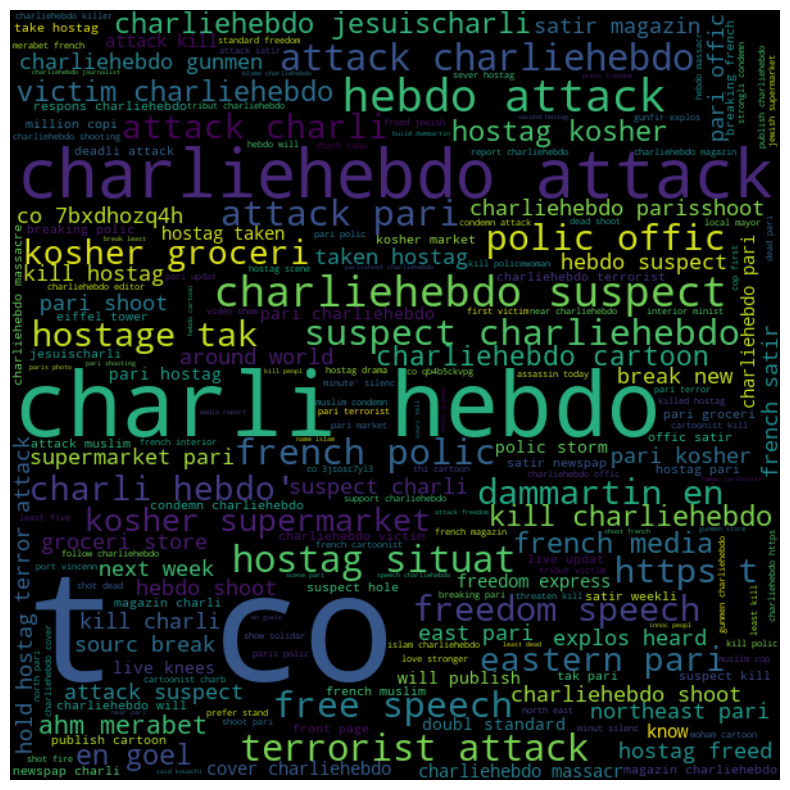

In [89]:
import matplotlib.pyplot as plt
words = ' '.join([text for text in rumour_df['clean_text']]) 

from wordcloud import WordCloud
wordcloud = WordCloud(width=600, height=600, random_state=129, max_font_size=120).generate(words) 
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

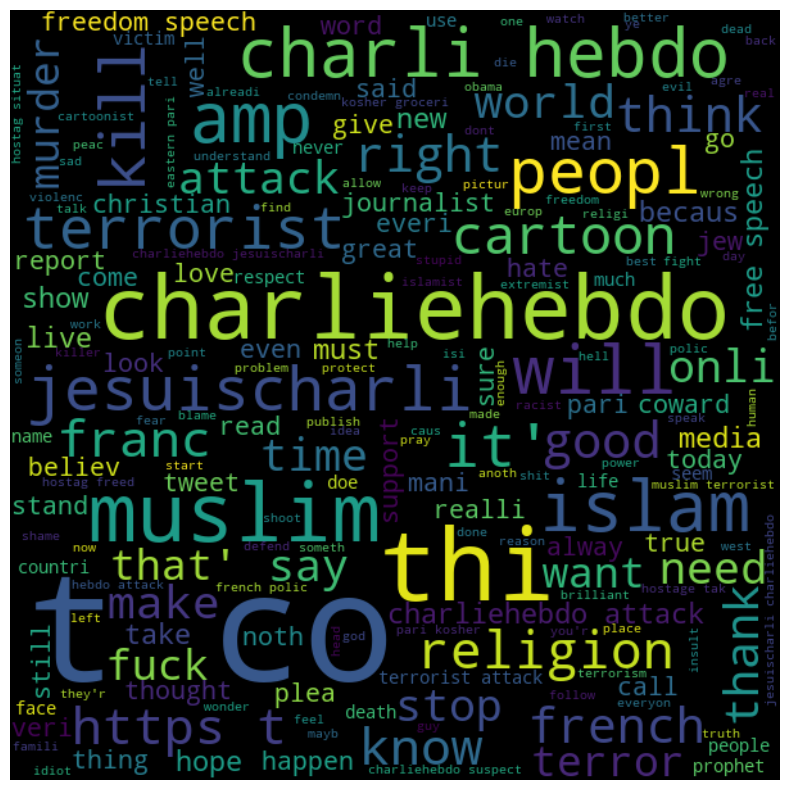

In [90]:
import matplotlib.pyplot as plt
words = ' '.join([text for text in rumour_df['clean_reply']]) 

from wordcloud import WordCloud
wordcloud = WordCloud(width=600, height=600, random_state=129, max_font_size=120).generate(words) 
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

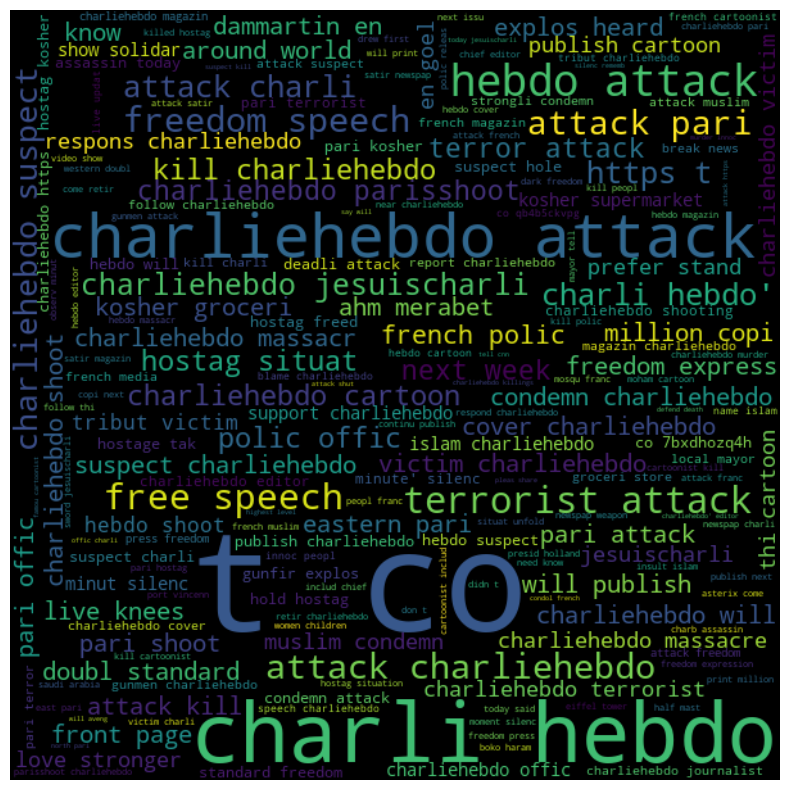

In [92]:
normal_words =' '.join([text for text in rumour_df['clean_text'][rumour_df['rumour'] == 0]]) # 0 means not a rumour 

wordcloud = WordCloud(width=600, height=600, random_state=129, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

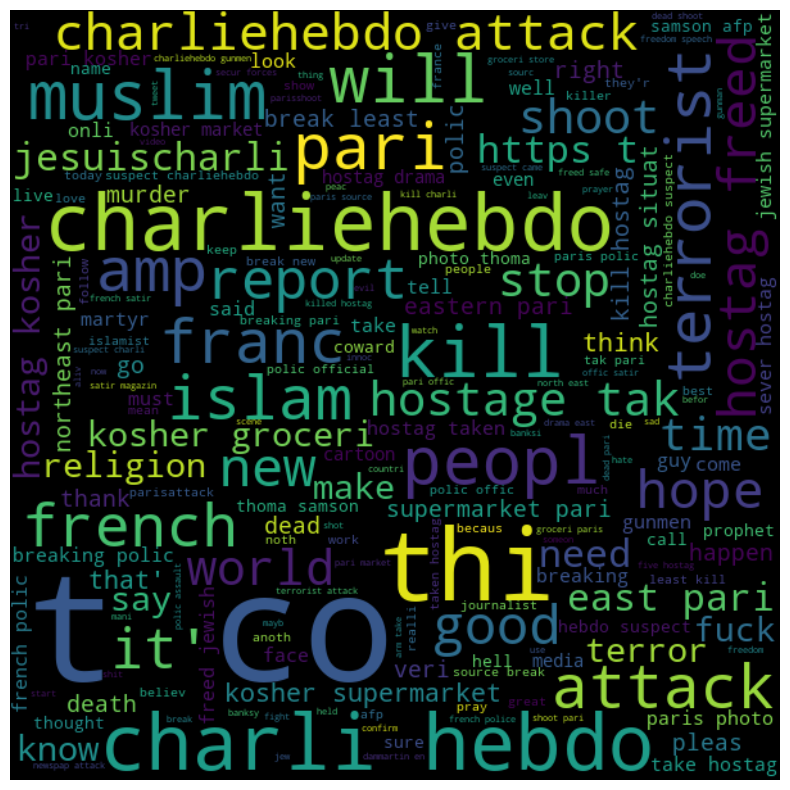

In [93]:
normal_words =' '.join([text for text in rumour_df['clean_reply'][rumour_df['rumour'] == 1]]) 

wordcloud = WordCloud(width=600, height=600, random_state=129, max_font_size=120).generate(normal_words)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Create Graph

In [94]:
import networkx as nx

In [95]:
short_graph = rumour_df.head(100)

In [96]:
G = nx.from_pandas_edgelist(df=short_graph, source='id', target='reply_id')

In [97]:
nodes = list(short_graph.id)
nodes1 = list(short_graph.reply_id)
nodes.extend(nodes1)
#print(nodes)

In [98]:
G.add_nodes_from(nodes_for_adding=nodes)

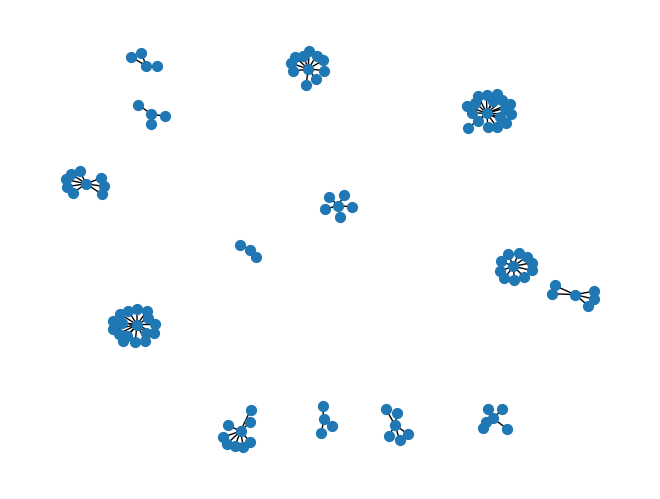

In [99]:
nx.draw(G,node_size = 50)